In [1]:
import anndata as ad
import muon as mu

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/scverse/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd

### 

### Load meta

In [4]:
meta = pd.read_csv('results/PRDX1_KO_screen.txt',dtype=str).set_index('Index')
meta.index.name = None
meta

,Treat,Rep
i09,T0,1
i10,T0,2
i11,vehicle,1
i12,vehicle,2
i13,vehicle,3
i14,DNAPKi,1
i15,DNAPKi,2
i16,DNAPKi,3


## Load the libraries

In [1]:
suppressPackageStartupMessages(library(stringr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(DESeq2))
suppressPackageStartupMessages(library(patchwork))

In [2]:
file.path(R.home("bin"), "R")

[1] "/data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/R/bin/R"

## Load the counts from the CRISPRi screen

In [3]:
counts_filename = 'counts.txt'
counts_df = read.table(counts_filename, check.names=FALSE)
sgRNA2gene = counts_df[,1:3]
counts_df = counts_df[,4:dim(counts_df)[2]]

In [4]:
head(counts_df, n = 1)

,i03,i04,i05,i06,i07,i08,i09,i10,i11,i12,⋯,i15,i16,i17,i18,i20,i21,i22,i23,i24,i25
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ATXN7L1_+_105516927.23-P1P2|ATXN7L1_+_105516907.23-P1P2++ATXN7L1_+_105516927.23-P1P2|ATXN7L1_+_105516907.23-P1P2,352,305,209,240,220,382,305,476,561,497,⋯,280,250,305,313,271,430,235,303,399,363


In [5]:
design_filename = 'RM6_samples.csv'
design_df = read.table(design_filename, check.names=FALSE,sep=',',header=1) %>% column_to_rownames('Index')

design_df$Drug <- as.factor(design_df$Drug) %>% relevel(ref = '.')
# design_df$Time <- as.factor(design_df$Time) %>% relevel(ref = 'T0')
# design_df$Exp <- as.factor(design_df$Exp) %>% relevel(ref = '1')

In [6]:
design_df

,Time,Exp,Rep,Drug,Conc
,<chr>,<int>,<int>,<fct>,<chr>
i03,T0,2,1,.,.
i04,T0,2,2,.,.
i05,T0,1,2,.,.
i06,T0,1,1,.,.
i07,Tend,1,1,DMSO,0.10perc
i08,Tend,1,2,DMSO,0.10perc
i09,Tend,1,3,DMSO,0.10perc
i10,Tend,1,1,RM6,1.56nM
i11,Tend,1,2,RM6,1.56nM


In [ ]:
# dmso = ifelse(grepl('DMSO',design_df$Drug), 'y','n')
# rm6  = ifelse(grepl('RM6',design_df$Drug), 'y','n')
# rsl3 = ifelse(grepl('RSL3',design_df$Drug), 'y','n')

In [ ]:
# design_df$dmso = dmso
# design_df$rm6  = rm6
# design_df$rsl3 = rsl3

## Apply DESeq2

> People routinely analyze Ribo-seq with DESeq2; in a typical Ribo-seq experiment, the setup is very similar: you compare the ratios Ribo WT / RNA WT with Ribo KD / RNA KD and look for genes with significant difference. Michael Love described the approach in [this](https://support.bioconductor.org/p/61509/) post (keywod "test for ratio of ratios"). Basically, the interaction term represents the ratio of the ratios. Therefore, you perform likelihood ratio test, where you compare the models with or without the interaction term. I use the implementation from [plastid](https://plastid.readthedocs.io/en/latest/examples/gene_expression.html#differential-translation-efficiency)

Create DESeq2 object

In [8]:
dds <- DESeqDataSetFromMatrix(
    countData = counts_df,
    colData = design_df,
    # Time	Exp	Rep	Drug	Conc
    design = ~ 0 + Drug
)

converting counts to integer mode



Run individual steps as shown [here](https://plastid.readthedocs.io/en/latest/examples/gene_expression.html#differential-translation-efficiency)

In [9]:
dds <- estimateSizeFactors(dds)
dds <- estimateDispersions(dds)

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates



Design model

In [10]:
# model = model.matrix(~ 0 + Drug + Time + Time:Drug,design_df) %>% data.frame

# design(dds) = ~ Drug #:Exp
# design(dds)

In [11]:
lrt_dds <- DESeq(dds, test="LRT", reduced = ~ 1)
# # likelihood ratio test on samples
# # compare model with and without interaction term
# dds <- nbinomLRT(
#     dds,
#     full = ~ 0 + Drug + Time + Time:Drug,
#     reduced = ~ Drug + Time
# )

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



## Normalize counts 


This part is <!-- missing for now!! --> done automatically as described in below links
- https://hbctraining.github.io/DGE_workshop_salmon_online/lessons/04b_DGE_DESeq2_analysis.html
- https://hbctraining.github.io/DGE_workshop/lessons/02_DGE_count_normalization.html

In [12]:
normalized_counts <- counts(dds, normalized=TRUE)

Save this normalized data matrix to file for later use:

In [13]:
write.table(normalized_counts, file="counts_DESeq2_normalized.txt", sep="\t", quote=F, col.names=NA)

### Extract results

- #### gamma $\gamma$ – ctrl vs T0
- #### tau $\tau$ – treatment vs T0
- #### rho $\rho$ – treatment vs ctrl
- #### kappa $\kappa$ – combination treatment vs. single treatment

In [225]:
RES = list()

### $\gamma$ – DMSO vs T0


In [226]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [227]:
# gamma – ctrl vs T0
RES[["gamma.DMSO_vs_T0"]]  = results(
    lrt_dds, 
    contrast=list("DrugDMSO","Drug."),
    listValues=c(1,-1))

In [228]:
summary(RES[["gamma.DMSO_vs_T0"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2553, 12%
LFC < 0 (down)     : 3628, 17%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\tau$ – RM6 vs T0


In [229]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [230]:
# tau – treatment vs T0
RES[["tau.RM6_vs_T0"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6","Drug."),
    listValues=c(1,-1))

In [231]:
summary(RES[["tau.RM6_vs_T0"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2231, 11%
LFC < 0 (down)     : 3950, 19%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\tau$ – RSL3 vs T0


In [232]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [233]:
# tau – treatment vs T0
RES[["tau.RSL3_vs_T0"]]  = results(
    lrt_dds, 
    contrast=list("DrugRSL3","Drug."),
    listValues=c(1,-1))

In [234]:
summary(RES[["tau.RSL3_vs_T0"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2318, 11%
LFC < 0 (down)     : 3863, 18%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\tau$ – RM6+RSL3 vs T0


In [235]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [236]:
# tau – treatment vs T0
RES[["tau.RM6+RSL3_vs_T0"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6_RSL3","Drug."),
    listValues=c(1,-1))

In [237]:
summary(RES[["tau.RSL3_vs_T0"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2318, 11%
LFC < 0 (down)     : 3863, 18%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\rho$ – RM6 vs DMSO


In [238]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [239]:
# rho – treatment vs ctrl
RES[["rho.RM6_vs_DMSO"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6","DrugDMSO"),
    listValues=c(1,-1))

In [240]:
summary(RES[["rho.RM6_vs_DMSO"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3678, 17%
LFC < 0 (down)     : 2503, 12%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\rho$ – RSL3 vs DMSO


In [241]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [242]:
# rho – treatment vs ctrl
RES[["rho.RSL3_vs_DMSO"]]  = results(
    lrt_dds, 
    contrast=list("DrugRSL3","DrugDMSO"),
    listValues=c(1,-1))

In [243]:
summary(RES[["rho.RSL3_vs_DMSO"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3866, 18%
LFC < 0 (down)     : 2311, 11%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\rho$ – RM6+RSL3 vs DMSO


In [244]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [245]:
# rho – treatment vs ctrl
RES[["rho.RM6+RSL3_vs_DMSO"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6_RSL3","DrugDMSO"),
    listValues=c(1,-1))

In [246]:
summary(RES[["rho.RM6+RSL3_vs_DMSO"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3729, 18%
LFC < 0 (down)     : 2451, 12%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\kappa$ – RM6+RSL3 vs RM6


In [247]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [248]:
# kappa – combination treatment vs. single treatment
RES[["kappa.RM6+RSL3_vs_RM6"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6_RSL3","DrugRM6"),
    listValues=c(1,-1))

In [249]:
summary(RES[["kappa.RM6+RSL3_vs_RM6"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 2923, 14%
LFC < 0 (down)     : 3258, 15%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



### $\kappa$ – RM6+RSL3 vs RSL3


In [250]:
resultsNames(lrt_dds)

[1] "Drug."        "DrugDMSO"     "DrugRM6"      "DrugRM6_RSL3" "DrugRSL3"

In [251]:
# kappa – combination treatment vs. single treatment
RES[["kappa.RM6+RSL3_vs_RSL3"]]  = results(
    lrt_dds, 
    contrast=list("DrugRM6_RSL3","DrugRSL3"),
    listValues=c(1,-1))

In [252]:
summary(RES[["kappa.RM6+RSL3_vs_RSL3"]])


out of 21097 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3652, 17%
LFC < 0 (down)     : 2528, 12%
outliers [1]       : 0, 0%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



## Explore results 

In [216]:
ann_res <- function(res,res_name=FALSE,threshold=50,score_name='log2FoldChange',stat_name='pvalue',up_label='resistance_hit',down_label='sensitivity_hit'){
    # create dataframe 
    df <- res %>% data.frame %>% 
        rownames_to_column('sgRNA') %>% rowwise %>% mutate(gene=str_split(sgRNA,"_")[[1]][1]) %>% column_to_rownames('sgRNA') %>%
        select(gene,score_name,stat_name)
    
    colnames(df) <- c('gene','score','stat')
    # df$score = df$score %>% as.double
    # df$stat = df$stat %>% as.double
    
    # label non-targeting as pseudogene
    df$label = "."
    df %>% mutate(label = replace(label, gene == 'non-targeting', 'pseudo')) -> df

    # calculate pseudogene sd
    pseudo_sd <- df %>% filter(label=='pseudo') %>% select(score) %>% as.list %>% unlist %>% sd

    df %>%
        mutate(label = replace(
            label,score > 0 & label != "pseudo" & score / pseudo_sd * -log10(stat) >= threshold, up_label
        ))-> df
    df %>%
        mutate(label = replace(
            label,score < 0 & label != "pseudo" & score / pseudo_sd * -log10(stat) <= -threshold, down_label
        )) -> df
    df %>%
        mutate(label = replace(label, label == '.', 'gene_non_hit')) -> df

    # reorder factors
    df$label <- factor(df$label, levels = c(down_label,up_label,'gene_non_hit','pseudo'))
    
    if (res_name !=FALSE){
        colnames(df) <- c('gene',
                          paste0(res_name,'.',score_name),
                          paste0(res_name,'.',stat_name),
                          'label')
    }    
    
    return (df)
}

In [217]:
plot_volcano <- function(df,threshold = 50,xlabel='log2FC',xlim=2){ 
    
    # calculate pseudogene sd
    pseudo_sd <- df %>% filter(label=='pseudo') %>% select(score) %>% as.list %>% unlist %>% sd
    draw_threshold <- function(x){threshold * pseudo_sd * sign(x)/(x)}

    p <- df %>% drop_na %>%
        ggplot(aes(x=score,y=-1*log10(stat)) ) + 
        geom_point(
            data = df %>% filter(label=='pseudo'), 
            alpha=1/100, size = 1, color = 'gray80') +
        geom_point(
            data = df %>% filter(label=='gene_non_hit'), 
            alpha=10/100, size = 1, color = 'gray90') +
        geom_point(
            data = df %>% filter(label=='resistance_hit'), 
            alpha=80/100, size = 2, color = '#fcae91') + 
        geom_point(
            data = df %>% filter(label=='sensitivity_hit'), 
            alpha=80/100, size = 2, color = '#bdd7e7') +
        theme_classic() +
        xlim(-xlim, xlim) +
        # scale_y_continuous(limits = c(0.5,4.5)) +
        # xlab(expression('CRISPRi decitabine phenotype (' * rho * ')')) +
        xlab(xlabel) +
        ylab(expression('-log'[10] * '(p-value)')) +
        stat_function(fun = draw_threshold, linetype = 'dashed', color = 'black') +
        scale_color_manual(values = c('#3182bd', '#de2d26'),
                           labels = c('Sensitizing Hits', 'Resistance Hits'))
    
    p <- p + theme(axis.text.x = element_text(size = 15, color = 'black'),
          axis.text.y = element_text(size = 15, color = 'black'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_blank(),
          legend.text = element_text(size = rel(1.5), color = 'black'),
          legend.position = 'right'
          )
    
    return (p)
}

label_sensitivity_hit <- function(p,dd, t_x = -0.2, t_y = -0.1){
    p + geom_point(
        data = dd, 
        size = 3, shape=21,
        stroke=0.5, 
        colour = "grey30", fill = "#3182bd"
    ) + 
    geom_text_repel(data = dd,
                    aes(label=gene),
                    color = 'black', size = 4.5, nudge_x = t_x, nudge_y = t_y)
}

label_resistance_hit <- function(p,dd, t_x = 0.2, t_y = 0.1){
    p + geom_point(
        data = dd, 
        size = 3, shape=21,
        stroke=0.5, 
        colour = "grey30", fill = "#de2d26"
    ) + 
    geom_text_repel(data = dd,
                    aes(label=gene),
                    color = 'black', size = 4.5, nudge_x = t_x, nudge_y = t_y)
}

In [218]:
names(RES)
# %>% group_by(label) %>% count

[1] "gamma.DMSO_vs_T0"       "tau.RM6_vs_T0"          "tau.RSL3_vs_T0"        
[4] "rho.RM6_vs_DMSO"        "rho.RSL3_vs_DMSO"       "kappa.RM6+RSL3_vs_RM6" 
[7] "kappa.RM6+RSL3_vs_RSL3" "rho.RM6+RSL3_vs_DMSO"

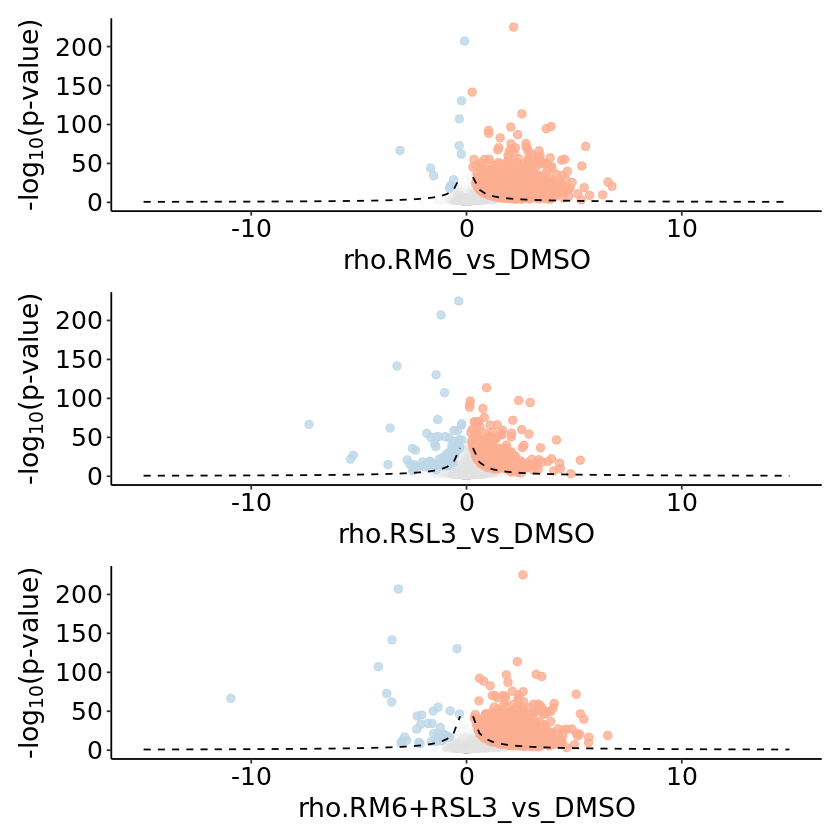

In [219]:
RES[["rho.RM6_vs_DMSO"]] %>% ann_res %>% plot_volcano(xlim=15,xlabel='rho.RM6_vs_DMSO') / 
RES[["rho.RSL3_vs_DMSO"]] %>% ann_res %>% plot_volcano(threshold=threshold,xlim=15,xlabel='rho.RSL3_vs_DMSO') /
RES[["rho.RM6+RSL3_vs_DMSO"]] %>% ann_res %>% plot_volcano(threshold=threshold,xlim=15,xlabel='rho.RM6+RSL3_vs_DMSO') 

Warning message:
“Transformation introduced infinite values in continuous y-axis”


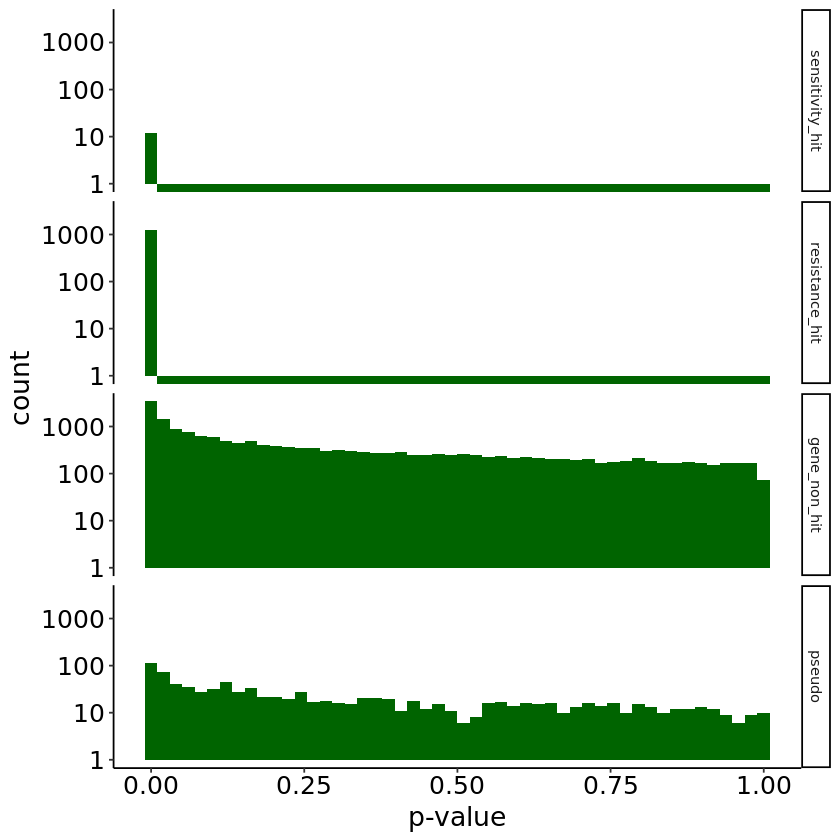

In [220]:
RES[["rho.RM6_vs_DMSO"]] %>% ann_res %>% ggplot(aes(x=stat)) + 
    geom_histogram(bins=50,fill="darkgreen",position="identity") + 
    facet_grid(label ~ .) +
    scale_color_brewer(palette="Dark2")+
    scale_fill_brewer(palette="Dark2")+
    scale_y_continuous(trans='log10') + 
    xlab('p-value') +
    theme_classic() + 
    theme(axis.text.x = element_text(size = 15, color = 'black'),
          axis.text.y = element_text(size = 15, color = 'black'),
          axis.title.x = element_text(size = 16),
          axis.title.y = element_text(size = 16),
          legend.title = element_blank(),
          legend.text = element_text(size = rel(1.5), color = 'black'),
          legend.position = 'right'
          )


___
Check top hit.

In [283]:
RES[["rho.RM6_vs_DMSO"]] %>% as.data.frame %>% arrange(desc(abs(log2FoldChange))) %>% rownames -> x 

In [284]:
RES[["rho.RM6_vs_DMSO"]][x[1],] %>% data.frame 

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
RPS20_+_56987038.23-P1P2|RPS20_+_56986933.23-P1P2++RPS20_+_56987038.23-P1P2|RPS20_+_56986933.23-P1P2,42.8778,6.756786,1.039523,102.6475,2.685795e-21,1.213324e-19


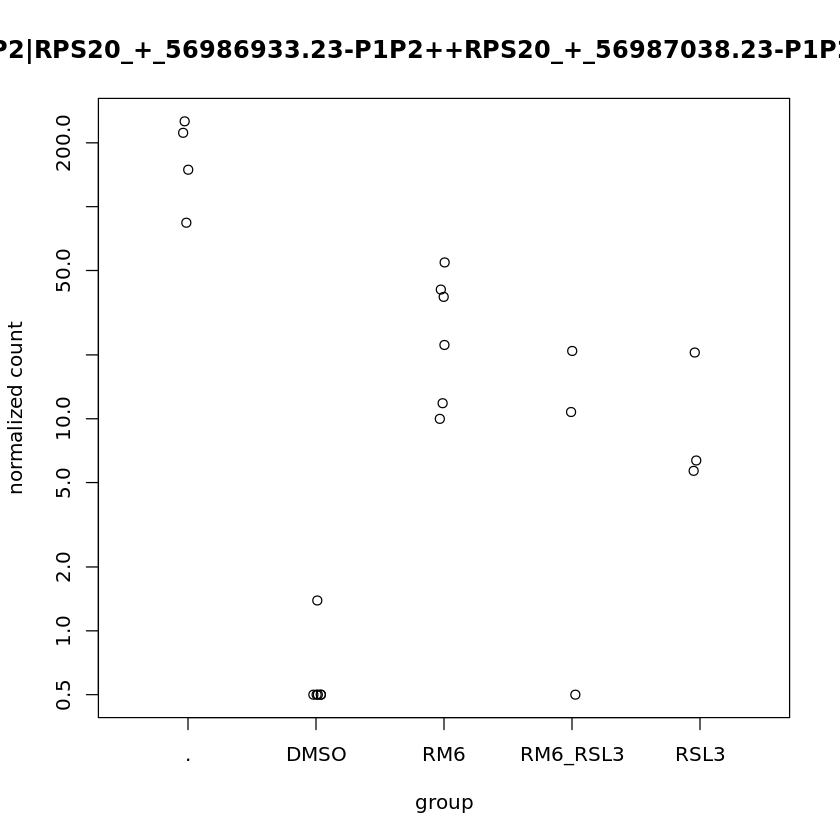

In [288]:
plotCounts(lrt_dds,x[1],intgroup=c('Drug'))

## Save files

Save the object as RDS

In [221]:
DESeq2_filename = 'DESeq2_results/dds.rds'
saveRDS(lrt_dds, DESeq2_filename)

Also save the object as a dataframe so that I can read it in python later

In [253]:
RES_dfs = list()

for (name in names(RES)){
    print (name)
    RES[[name]]%>% ann_res %>% group_by(label) %>% count %>% data.frame %>% print 
    RES[[name]]%>% 
        ann_res(res_name=name) %>% 
        write.table(paste0('DESeq2_results/',name,'.txt'), quote = F, sep="\t", row.names = T)
}

[1] "gamma.DMSO_vs_T0"
            label     n
1 sensitivity_hit  1332
2  resistance_hit     6
3    gene_non_hit 18733
4          pseudo  1026
[1] "tau.RM6_vs_T0"
            label     n
1 sensitivity_hit  1064
2  resistance_hit    14
3    gene_non_hit 18993
4          pseudo  1026
[1] "tau.RSL3_vs_T0"
            label     n
1 sensitivity_hit  1195
2  resistance_hit     4
3    gene_non_hit 18872
4          pseudo  1026
[1] "tau.RM6+RSL3_vs_T0"
            label     n
1 sensitivity_hit   975
2  resistance_hit    14
3    gene_non_hit 19082
4          pseudo  1026
[1] "rho.RM6_vs_DMSO"
            label     n
1 sensitivity_hit    12
2  resistance_hit  1229
3    gene_non_hit 18830
4          pseudo  1026
[1] "rho.RSL3_vs_DMSO"
            label     n
1 sensitivity_hit    87
2  resistance_hit   454
3    gene_non_hit 19530
4          pseudo  1026
[1] "rho.RM6+RSL3_vs_DMSO"
            label     n
1 sensitivity_hit    35
2  resistance_hit  1031
3    gene_non_hit 19005
4          pseudo  1026

## 

In [289]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /data_gilbert/home/aarab/anaconda3/envs/deseq2/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] patchwork_1.1.1             forcats_0.5.1              
 [3] stringr_1.4.0               dplyr_1.0.7                
 [5] purrr_0.3.4                 readr_2.0.2                
 [7] tidyr_1.1.4                 tibble_3.1.6               
 [9] ggplot2_3.3.5              